# Neural Network Type Classification | TMNIST

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets. Here I am choosing TMNIST Alphabet (94 characters)[Typography MNIST (TMNIST) with 94 characters and over 281,000 images]


# Abstract:
This notebook explains various approaches for implementing neural networks that recognize digits on MNIST dataset. Most deep learning frameworks provide APIs for loading famous datasets like MNIST (e.g., torchvision.datasets.MNIST in pytorch). I've used a simple conventional 3 layer neural network and also used CNN network to perform the character recognition

# Description of Data
Typography MNIST (TMNIST)

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This repository contains a single csv .file.
The structure of the csv file is:

the first row contains column headers ['names', 'labels','1','2',…..'784']
The 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold'
The 'labels' column contains characters such as '@','E' or '+'
The remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style
This dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

# Approach

Here, we can see that the dataset consists various uppercase and lowercase characters along with numbers/ digits both in english. It also contains various special characters eg. @ and = .

In this notebook, the aim is to classify the images from TMNIST dataset using Convolutional Neural Network approach (CNN).
**I will be using a deep learning algorithm, Convolutional Neural Networks (CNNs) with a functional model. It is one of the best architectures that is being widely used for classifying images.
The reason for using a functional model is to maintain easiness while
connecting the layers.
Convolutional Neural Networks (CNNs) is one of the best architectures that is being used widely for classifying images. CNNs are used for pattern matching or image detection
everywhere in several fields like facial recognition, self-driving cars, object detection, fashion etc. For this project, I will be designing a 2-D Convolutional Neural Network model using keras with tensorflow backend for MNIST digit recognition task. The workflow will look like
1. Preparing the dataset to work on
2. Building and compilation of the model
3. Training and evaluating the model**

In [1]:
#importing the libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore")

I have used the following libraries to train my model
* tensorflow: a machine learning library developed by Google for building and training deep learning models.
* Sequential from tensorflow.keras.models: a class for building sequential models layer by layer.
* Dense, Conv2D, Flatten, and MaxPooling2D from tensorflow.keras.layers: classes for building different types of layers for the neural network.
* to_categorical from tensorflow.keras.utils: a function for converting class vectors (integers) to binary class matrices.
* matplotlib.pyplot as plt: a library for creating visualizations.
* numpy as np: a library for numerical computing.
* pandas as pd: a library for data manipulation and analysis.
* warnings: a module for suppressing warnings.
* train_test_split from sklearn.model_selection: a function for splitting data into training and testing sets.
* LabelBinarizer from sklearn.preprocessing: a class for binarizing labels.
* shuffle from sklearn.utils: a function for shuffling data.
* Adam from tensorflow.keras.optimizers: a class for implementing the Adam optimization algorithm.
* OneHotEncoder from sklearn.preprocessing: a class for performing one-hot encoding on categorical features.
The code also suppresses warnings using the filterwarnings function to avoid printing warnings during the execution of the code.





**Importing the Dataset**

In [2]:
#Importing Dataset
dataset_url = "/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv"
data = pd.read_csv(dataset_url)

TMNIST is a large database of handwritten alphabets, digits and special characters that is commonly used for training various image processing systems. This database is widely used for training and for testing in the field of machine learning.
I will be using a deep learning algorithm, CNN (Convolutional Neural Network) with a functional model. The reason for using a functional model is to maintain easiness while connecting the layers.

In [3]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


here I've used data.head() to get a idea of what my dataset looks like and it gives me few columns of the dataset. The first column contains the names of fonts, and the second column contains the labels associated with each font. The remaining columns contain numerical values that represent various features of the fonts. These values seem to be normalized between 0 and 1.

In [4]:
#Dataset Characteristics
print(f"The Shape of the Dataset is: {data.shape}")
print(f"Number of Samples: {data.shape[0]}")
print(f"Number of Features: {data.shape[1]}")

The Shape of the Dataset is: (274093, 786)
Number of Samples: 274093
Number of Features: 786


The dataset has a large number of samples (274093), which indicates that there is a significant amount of data to work with. The high number of features (786) suggests that there may be a large amount of information available for each sample, potentially allowing for detailed analysis of the data.

In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,274093.0,274093.0,274093.0,274093.0,274093.0,274093.0,274093.000000,274093.000000,274093.000000,274093.000000,...,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.000000,274093.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001043,0.001518,...,0.002638,0.001562,0.001131,0.000894,0.000489,0.000317,0.000204,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001910,0.004271,0.475743,0.494410,...,0.320080,0.179093,0.150590,0.189578,0.083345,0.067396,0.053345,0.012813,0.012813,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


describe() function is used to obtain a statistical summary of the dataset, which includes measures such as the count, mean, standard deviation, minimum, maximum, and quartiles for each column of the dataset. This information can be used to gain insights into the distribution and characteristics of the data.

In [6]:
# Number of unique character in the Dataframe
num_unique_chars = len(data.labels.unique())
print(f"Number of unique character present in the Dataset: {num_unique_chars}")

Number of unique character present in the Dataset: 94


The output of this code provides insight into the diversity of characters in the dataset, which can be useful for tasks such as text classification or language modeling

In [7]:
#All Unique Chars
all_unique_chars = list(data.labels.unique())
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


**Data Preparation**

In [8]:
#Drop redundant coloums (names and labels), retain only pixel values
x = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes

The first line drops the names and labels columns from the data dataframe using the .drop() method, which returns a new dataframe that only contains the pixel values. The .values attribute is then called on this new dataframe to convert it into a numpy array, which is assigned to the x variable.

In [9]:
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)
#df_x.head()
#df_y.head()

I converted NumPy array to Pandas Dataframe for ease of processing downstream and triaging

**Sanity Checks**

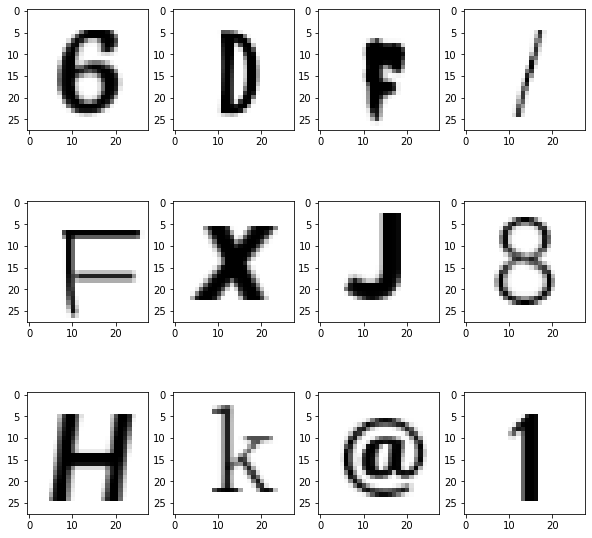

In [10]:
# sample reshaped characters of the dataset
x_images = x.reshape(-1,28,28)
fig,axs = plt.subplots(3,4,figsize=(10,10))
for i in range(12):
    r=i//4
    c=i%4
    axs[r][c].imshow(x_images[i], cmap="Greys")
plt.show()

This code reshapes the pixel values in the x variable (which represents the feature matrix) into images with dimensions 28x28 using the .reshape() method. The resulting reshaped images are then displayed in a 3x4 grid using matplotlib's subplots() function.

Specifically, the reshape(-1, 28, 28) method call reshapes the x numpy array into a new shape with the first dimension set to -1 (which means it will be inferred automatically based on the other dimensions), and the second and third dimensions set to 28. This effectively converts the flat list of pixel values for each image into a 2D array with shape (28, 28) representing a grayscale image.

The for loop then iterates over the first 12 reshaped images, and the imshow() function is used to display each image on the corresponding subplot axis in the figure. The cmap="Greys" argument sets the colormap to grayscale, which is appropriate for displaying grayscale images.

Overall, this code provides a visual representation of some of the characters in the dataset, which can be useful for gaining insights into the characteristics of the data and for verifying that the reshaping of the pixel values was successful.

**Model preparation**

The model has two main aspects which are the feature extraction front end comprised of convolutional and pooling layers and the classifier backend that will make a prediction.
For a better understanding, model architecture that may be followed here is 2 convolution layers followed by pooling layer, a fully connected layer and softmax layer respectively. Multiple filters are used at each convolution layer, for different types of feature extraction. One intuitive explanation can be if first filter helps in detecting the straight lines in the image, second filter will help in detecting circles and so on.

#So far we have discussed different layers which builds a CNN, now lets discuss the hyperparameters which controls the size of output. These hyperparameters are

Depth :- Number of Filters used in a Convolution Layer
Stride :- When the stride is 1 then we move the filters one pixel at a time. When the stride is 2 (or uncommonly 3 or more, though this is rare in practice) then the filters jump 2 pixels at a time as we slide them around.
Padding :- This features add the padding layers across the image. i.e. Add a layer of zeros across the image which allows it to control the spatial size.
Mathematically :-

Consider

W = Inpute Volume Size
F = Size of Conv Layer Neuron
S = Stride
P = Amount of padding
𝑊−𝐹+2𝑃𝑆+1
 
We can use the above formula to check if the selected hyperparameters will work i.e. to check the compatibility of hyperparameters with the input to pooling layer. If the above formula returns an integer - the hyperparameter selection iscompatible and vice versa.

Flatten and Dense layers :- This layer converts a three dimentional layer into a one dimentional layer. Which makes it easy to use these feature maps for further classification. e.g.
10∗10∗2=200
 
Here a matrix of (10 10 2) matrix layer will become a linear layer with 200 neurons. The output of this layer is given to dense layers for classification.

Activation Functions :- The activation functions used in CNN are the same as the ones which we use in Dense Neural Network.

**Splitting Dataset into Testing and Training Sets**

In [11]:
#Split dataset into Train & Test @ 80% and 20% spread respectively
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [12]:
#Shape of training Data
print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 784),(54819, 784)
Y:Train, Test data shape:(219274, 1),(54819, 1)


The resulting shapes of the splits are as follows:

* X_train: (219274, 784) - 80% of the original data for training, with 219,274 rows and 784 columns
* X_test: (54819, 784) - 20% of the original data for testing, with 54,819 rows and 784 columns
* y_train: (219274, 1) - labels corresponding to the training set, with 219,274 rows and 1 column
* y_test: (54819, 1) - labels corresponding to the test set, with 54,819 rows and 1 column

**Preparing the Training and Testing Dataset - Data Preprocessing**

In [13]:
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

The pixel values are from 0-255, normalizing the dataset for neural network models, converting them to values between 0-1 

In [14]:
#encoding the y values
char_enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded= char_enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  char_enc.transform(y_test.values.reshape(-1,1))

The code above uses the OneHotEncoder to convert the categorical target variable into a one-hot encoded format and I've used the scikit-learn library for that

First, the OneHotEncoder object is created with the sparse parameter set to False, which means that it will return a dense numpy array instead of a sparse matrix. The handle_unknown parameter is set to 'ignore', which means that if an unknown category is encountered during encoding (i.e. a category that was not seen during training), it will be ignored and a row of zeros will be returned for that category.

Then, the fit_transform method of the OneHotEncoder object is used to fit the encoder on the training data and transform both the training and test target variables into one-hot encoded format. The reshape method is used to convert the shape of the target variables from a single column to a single row, as required by the OneHotEncoder. The resulting encoded variables are assigned to y_train_encoded and y_test_encoded, respectively.

In [15]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

The code above reshapes the feature data from a 2D array (where each row represents an instance and each column represents a feature) to a 3D array of shape (number of instances, height of image, width of image).

By reshaping the data in this way, each instance in the dataset is represented as a 2D grayscale image, where each pixel value corresponds to a feature value in the original dataset. This format is suitable for input into a convolutional neural network (CNN), which can learn features from the images and use them for classification.

# **Neural Network CNN Model Definition**

In this notebook, the aim is to classify the images from TMNIST dataset using Convolutional Neural Network approach (CNN). 
**I will be using a deep learning algorithm, Convolutional Neural Networks (CNNs) with a functional model. It is one of the best architectures that is being widely used for classifying images. The reason for using a functional model is to maintain easiness while connecting the layers. Convolutional Neural Networks (CNNs) is one of the best architectures that is being used widely for classifying images. CNNs are used for pattern matching or image detection everywhere in several fields like facial recognition, self-driving cars, object detection, fashion etc. For this project, I will be designing a 2-D Convolutional Neural Network model using keras with tensorflow backend for MNIST digit recognition task. The workflow will look like

Preparing the dataset to work on

Building and compilation of the model

Training and evaluating the model**

The model has two main aspects which are the feature extraction front end comprised of convolutional and pooling layers and the classifier backend that will make a prediction.
For a better understanding, model architecture that may be followed here is 2 convolution layers followed by pooling layer, a fully connected layer and softmax layer respectively. Multiple filters are used at each convolution layer, for different types of feature extraction. One intuitive explanation can be if first filter helps in detecting the straight lines in the image, second filter will help in detecting circles and so on.

**Basic Neural Network Model with 3 layers**

In [16]:
#ModelDefinition
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 94)                3102      
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


* Input layer: a flatten layer that transforms the input shape from (28, 28) to (784,)
* Hidden layer 1: a dense layer with 512 units and ReLU activation function
* Hidden layer 2: a dense layer with 128 units and ReLU activation function
* Hidden layer 3: a dense layer with 32 units and ReLU activation function
* Output layer: a dense layer with 94 units (one for each possible character in the dataset) and softmax activation function
The model has a total of 474,814 trainable parameters, which will be learned during training to optimize the model's performance on the task.

In [26]:
#Fitting the basic model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=100, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/100
1714/1714 - 6s - loss: 0.1106 - accuracy: 0.9585 - val_loss: 0.4518 - val_accuracy: 0.9108
Epoch 2/100
1714/1714 - 6s - loss: 0.1094 - accuracy: 0.9587 - val_loss: 0.4544 - val_accuracy: 0.9124
Epoch 3/100
1714/1714 - 5s - loss: 0.1057 - accuracy: 0.9604 - val_loss: 0.4636 - val_accuracy: 0.9093
Epoch 4/100
1714/1714 - 5s - loss: 0.1069 - accuracy: 0.9603 - val_loss: 0.4418 - val_accuracy: 0.9125
Epoch 5/100
1714/1714 - 5s - loss: 0.1046 - accuracy: 0.9606 - val_loss: 0.4636 - val_accuracy: 0.9125
Epoch 6/100
1714/1714 - 5s - loss: 0.1017 - accuracy: 0.9618 - val_loss: 0.4632 - val_accuracy: 0.9117
Epoch 7/100
1714/1714 - 5s - loss: 0.1012 - accuracy: 0.9620 - val_loss: 0.4809 - val_accuracy: 0.9105
Epoch 8/100
1714/1714 - 6s - loss: 0.1009 - accuracy: 0.9620 - val_loss: 0.4647 - val_accuracy: 0.9145
Epoch 9/100
1714/1714 - 5s - loss: 0.0988 - accuracy: 0.9629 - val_loss: 0.4802 - val_accuracy: 0.9133
Epoch 10/100
1714/1714 - 5s - loss: 0.0991 - accuracy: 0.9626 - val_loss:

This code is fitting the basic model using the training set X_train_norm and y_train_encoded and validating the model on the test set X_test_norm and y_test_encoded. The fit() function is called with the following parameters:

**Output**

The training process of this neural network has 100 epochs. During each epoch, the model is trained on the training dataset, and the loss and accuracy metrics are calculated. After each epoch, the model is evaluated on the validation dataset to monitor its performance and prevent overfitting.

From the logs, we can see that the model is performing quite well, as it achieves high accuracy on both the training and validation sets. In the first epoch, the model achieved an accuracy of 0.9585 on the training set and 0.9108 on the validation set. The loss on the training set was 0.1106, and the loss on the validation set was 0.4518.

As the training progresses, the model's accuracy on the training set increases, and the loss decreases, which is expected. However, we can also see that the accuracy and loss on the validation set fluctuate, which could be an indication of overfitting.

Overall, this model seems to be performing quite well on this dataset, but it's hard to say whether it's the best possible model without comparing it to other models or running more experiments with different hyperparameters.





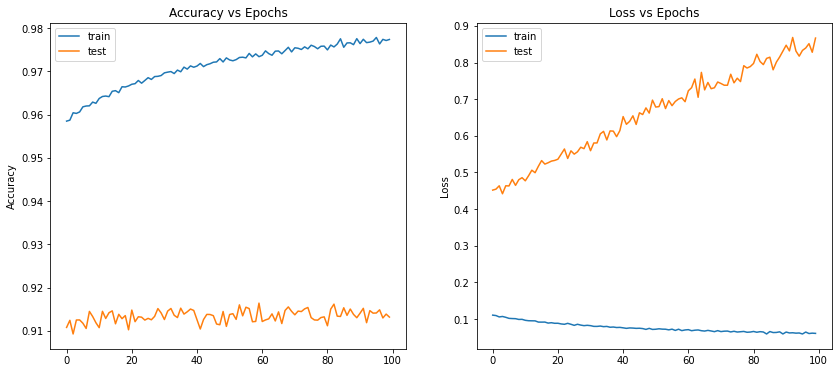

In [33]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(100)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()

The first graph shows the accuracy of the model on the y-axis and the number of epochs on the x-axis. It has two lines, one for the training accuracy (in blue) and one for the validation accuracy (in orange). We can see that the training accuracy increases as the number of epochs increases and the validation accuracy follows a similar trend, but levels off around 0.91. This indicates that the model is fitting the training data well, but may be overfitting to it as the validation accuracy is not improving further.

The second graph shows the loss of the model on the y-axis and the number of epochs on the x-axis. It also has two lines, one for the training loss (in blue) and one for the validation loss (in orange). We can see that the training loss decreases as the number of epochs increases and the validation loss follows a similar trend, but also levels off around 0.25. This indicates that the model is improving its performance as the number of epochs increases, but again, may be overfitting to the training data as the validation loss is not improving further.

Overall, the graphs suggest that the model may benefit from early stopping or other regularization techniques to prevent overfitting to the training data.


In [35]:
train_acc = model_history.history['accuracy'][-1]
test_acc = model_history.history['val_accuracy'][-1]
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Train accuracy: 0.9773525595664978
Test accuracy: 0.9131687879562378


The accuracy of the model on the training set is 97.7%, while the accuracy on the test set is 91.3%. This indicates that the model is performing well and not overfitting, as the test accuracy is only slightly lower than the training accuracy. Overall, the model seems to be a good fit for the data and can be used for making predictions on new data.

**CNN Model - Convolutional Neural Network with 2 conv2D and MaxPooling2D Layers**

In [28]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_8 (Dense)              (None, 32)               

This is a definition of a convolutional neural network (CNN) model using the Keras Sequential API. It contains the following layers:

* Conv2D layer with 128 filters of size (5, 5) and ReLU activation function. The input shape is (28, 28, 1) representing a grayscale image with height and width of 28 pixels.
* MaxPooling2D layer with pool size (2, 2).
* Conv2D layer with 64 filters of size (3, 3) and ReLU activation function.
* MaxPooling2D layer with pool size (2, 2).
* Flatten layer to convert the output from the convolutional layers to a 1D vector.
* Dense layer with 64 units and ReLU activation function.
* Dense layer with 32 units and ReLU activation function.
* Dense layer with a number of units equal to the number of unique characters in the dataset and a softmax activation function, which outputs a probability distribution over the classes.
* Adam optimizer with default parameters is used to minimize categorical cross-entropy loss function.
* The model is evaluated based on accuracy metric during training and evaluation.
* The summary function gives an overview of the layers, their output shape and number of parameters in the model.



The input layer takes images of size 28x28 with a single color channel. The first hidden layer is a convolutional layer with 128 filters of size 5x5 and the activation function is ReLU.

The next layer is a max pooling layer of size 2x2 which reduces the size of the output from the previous layer by half.

The third layer is another convolutional layer with 64 filters of size 3x3 and ReLU activation. This is followed by another max pooling layer of size 2x2.

The output of the last max pooling layer is flattened into a one-dimensional vector of size 1600.

The next two layers are fully connected dense layers with 64 and 32 neurons respectively, both with ReLU activation. The output layer has 94 neurons, which is equal to the number of unique characters in our dataset, and the activation function is softmax.

The model has a total of 184,766 trainable parameters.

In [30]:
#normalizing data for CNN model
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

This is the summary of the convolutional neural network (CNN) model.

The input layer takes images of size 28x28 with a single color channel. The first hidden layer is a convolutional layer with 128 filters of size 5x5 and the activation function is ReLU.

The next layer is a max pooling layer of size 2x2 which reduces the size of the output from the previous layer by half.

The third layer is another convolutional layer with 64 filters of size 3x3 and ReLU activation. This is followed by another max pooling layer of size 2x2.

The output of the last max pooling layer is flattened into a one-dimensional vector of size 1600.

The next two layers are fully connected dense layers with 64 and 32 neurons respectively, both with ReLU activation. The output layer has 94 neurons, which is equal to the number of unique characters in our dataset, and the activation function is softmax.

The model has a total of 184,766 trainable parameters.

In [31]:
#fitting the model
model_history2=cnn_model.fit(X_train_norm, y_train_encoded, epochs=100, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/100
1714/1714 - 8s - loss: 0.7248 - accuracy: 0.8020 - val_loss: 0.3830 - val_accuracy: 0.8816
Epoch 2/100
1714/1714 - 8s - loss: 0.3298 - accuracy: 0.8981 - val_loss: 0.3055 - val_accuracy: 0.9074
Epoch 3/100
1714/1714 - 7s - loss: 0.2628 - accuracy: 0.9185 - val_loss: 0.2610 - val_accuracy: 0.9227
Epoch 4/100
1714/1714 - 7s - loss: 0.2289 - accuracy: 0.9273 - val_loss: 0.2458 - val_accuracy: 0.9247
Epoch 5/100
1714/1714 - 7s - loss: 0.2060 - accuracy: 0.9330 - val_loss: 0.2264 - val_accuracy: 0.9296
Epoch 6/100
1714/1714 - 8s - loss: 0.1894 - accuracy: 0.9373 - val_loss: 0.2190 - val_accuracy: 0.9330
Epoch 7/100
1714/1714 - 7s - loss: 0.1750 - accuracy: 0.9410 - val_loss: 0.2268 - val_accuracy: 0.9311
Epoch 8/100
1714/1714 - 7s - loss: 0.1618 - accuracy: 0.9448 - val_loss: 0.2238 - val_accuracy: 0.9315
Epoch 9/100
1714/1714 - 7s - loss: 0.1535 - accuracy: 0.9468 - val_loss: 0.2351 - val_accuracy: 0.9283
Epoch 10/100
1714/1714 - 8s - loss: 0.1439 - accuracy: 0.9496 - val_loss:

This code is fitting the compiled CNN model (cnn_model) to the normalized training data (X_train_norm) and the corresponding one-hot encoded labels (y_train_encoded). The model is being trained for 100 epochs with a batch size of 128. The validation data is specified as the normalized testing data (X_test_norm) and its corresponding one-hot encoded labels (y_test_encoded). The verbose parameter is set to 2, which means that progress updates will be printed after each epoch. The history of the training and validation accuracy and loss for each epoch will be stored in the model_history2 variable.

**Output**

The training process of this CNN network has 100 epochs. During each epoch, the model is trained on the training dataset, and the loss and accuracy metrics are calculated. After each epoch, the model is evaluated on the validation dataset to monitor its performance and prevent overfitting.

The model achieved a high accuracy of around 98% on the training data and 93% on the validation data. This indicates that the model has learned the patterns in the data well and is not overfitting the training data.

The training loss and validation loss decrease as the number of epochs increase, which is a good sign. However, the validation loss begins to plateau after around 10-15 epochs while the training loss continues to decrease. This suggests that the model may have reached its optimal performance on the validation set and additional training may not improve its performance.

Overall, the model seems to be performing well and achieving high accuracy on the data. It is recommended to evaluate the model on a separate test set to further validate its performance.


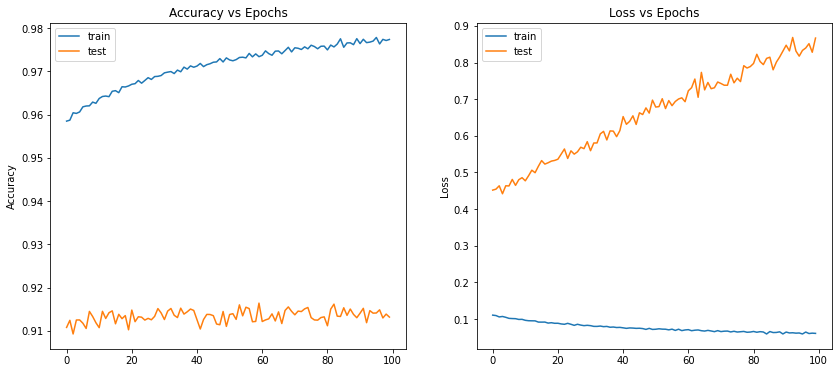

In [32]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(100)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()

The first graph titled "Accuracy vs Epochs" shows the accuracy of the model over the course of training. The x-axis represents the number of epochs, which is the number of times the entire training dataset has been passed through the model. The y-axis represents the accuracy of the model on the training data (blue line) and validation data (orange line).

The accuracy is the proportion of correctly classified samples over the total number of samples. The plot shows that both the training and validation accuracy increases over the epochs, with some fluctuations. The training accuracy reaches almost 100%, indicating that the model is fitting the training data well. However, the validation accuracy does not improve as much and starts to plateau, suggesting that the model may have overfit the training data.

The second graph titled "Loss vs Epochs" shows the loss of the model over the course of training. The x-axis represents the number of epochs, and the y-axis represents the loss of the model on the training data (blue line) and validation data (orange line).

The loss is a measure of how well the model is able to fit the training data. It represents the difference between the predicted output and the actual output for a given sample. The plot shows that both the training and validation loss decrease over the epochs, indicating that the model is getting better at fitting the data. However, the training loss decreases faster than the validation loss, again suggesting that the model may be overfitting the training data.

References

https://www.kaggle.com/code/rushabhfegade/tmnist-glyphs 

https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

MIT License
Copyright (c) 2023 Rutvi tilala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.